# Processing Dataset

- Import label.csv file with pandas
- Accessing each image present in the train folder
- Renaming each image with the dobgs breed using label.csv and creating folder for each breed

In [ ]:
import pandas as pd

labels = pd.read_csv("/Users/harshit/Downloads/dog-breed-identification/labels.csv")



import os
dirname = "/Users/harshit/Downloads/dog-breed-identification/train"

i = 0
if os.path.isdir(dirname):
    for filename in os.listdir(dirname):
        new_name = labels.loc[labels['id'] == filename[:-4]]
        os.rename(dirname + "/" + filename, str(new_name["breed"].values[0])+ str(i)+".jpg")
        i+=1
            
        

# Importing Libraries


In [1]:
import tensorflow as tf
import pydot
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, AveragePooling2D, GlobalAveragePooling2D

# Creating Classidier Model

- Using Tensorflow importing exsisting ResNet50 V2 Model and using it as base model
- Loading the exsisting model with pretrained Imagenet model weights
- Freezing the base model
- Adding Average Pooling, Batch normalization and Dropout rate to custom output layer
- Concating base layer and output layer
- Priting model summary

In [2]:
# Initialising the CNN
classifier_base = tf.keras.applications.ResNet50V2(input_shape = (64,64,3),
    include_top=False, weights = "imagenet"
)

# Compiling the CNN
classifier_base.trainable = False
classifier_base.summary()

x = classifier_base.output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)


predictions = Dense(10, activation = 'softmax')(x)
classifier = Model(classifier_base.input,predictions)
classifier.summary()

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

Model: "resnet50v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 70, 70, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 32, 32, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 34, 34, 64)   0           conv1_conv[0][0]                 
_________________________________________________________________________________________

# Preparing training set using ImageDataGenerator

- Using ImageDataGenerator to preprocess images by rescaling them and creating batch size

In [3]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/Users/harshit/Downloads/dog-breed-identification/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

# test_set = test_datagen.flow_from_directory('/Users/harshit/Downloads/dog-breed-identification/test',
#                                             target_size = (64, 64),
#                                             batch_size = 32,
#                                             class_mode = 'binary')

Found 841 images belonging to 10 classes.


# Training Model 

- Training model on 150 epochs (50 + 100) burst
- Saving weights of the trained model

In [4]:
#loading previously saved model
classifier = tf.keras.models.load_model('dog_breeder_resent50v2_10.h5')

classifier.fit(training_set, epochs = 100)
classifier.save("dog_breeder_resent50v2_10.h5")


Epoch 1/100
27/27 [==============================] - 6s 159ms/step - loss: 0.9773 - accuracy: 0.6849
Epoch 2/100
27/27 [==============================] - 5s 166ms/step - loss: 1.0046 - accuracy: 0.6647
Epoch 3/100
27/27 [==============================] - 5s 177ms/step - loss: 0.9664 - accuracy: 0.6730
Epoch 4/100
27/27 [==============================] - 5s 165ms/step - loss: 1.0149 - accuracy: 0.6587
Epoch 5/100
27/27 [==============================] - 5s 172ms/step - loss: 0.9312 - accuracy: 0.6992
Epoch 6/100
27/27 [==============================] - 5s 175ms/step - loss: 0.9376 - accuracy: 0.6932
Epoch 7/100
27/27 [==============================] - 5s 187ms/step - loss: 0.9729 - accuracy: 0.67901s - loss: 1.0238 
Epoch 8/100
27/27 [==============================] - 6s 224ms/step - loss: 0.9598 - accuracy: 0.6766
Epoch 9/100
27/27 [==============================] - 7s 254ms/step - loss: 1.0212 - accuracy: 0.6564
Epoch 10/100
27/27 [==============================] - 8s 288ms/step - los

27/27 [==============================] - 7s 242ms/step - loss: 0.9604 - accuracy: 0.6849
Epoch 82/100
27/27 [==============================] - 6s 227ms/step - loss: 0.9570 - accuracy: 0.6932
Epoch 83/100
27/27 [==============================] - 6s 222ms/step - loss: 0.8857 - accuracy: 0.6837
Epoch 84/100
27/27 [==============================] - 6s 223ms/step - loss: 0.9320 - accuracy: 0.6813
Epoch 85/100
27/27 [==============================] - 6s 220ms/step - loss: 0.9824 - accuracy: 0.6564
Epoch 86/100
27/27 [==============================] - 6s 212ms/step - loss: 1.0448 - accuracy: 0.6647
Epoch 87/100
27/27 [==============================] - 6s 213ms/step - loss: 0.9587 - accuracy: 0.6837
Epoch 88/100
27/27 [==============================] - 6s 206ms/step - loss: 0.9566 - accuracy: 0.6849
Epoch 89/100
27/27 [==============================] - 6s 206ms/step - loss: 0.9179 - accuracy: 0.6944
Epoch 90/100
27/27 [==============================] - 6s 209ms/step - loss: 0.9933 - accuracy: 

# Ploting model performance data

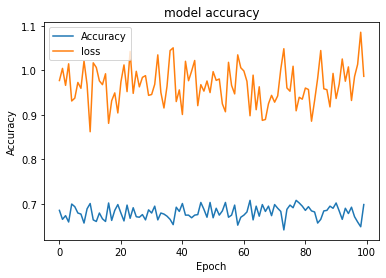

In [5]:
plt.plot(classifier.history.history['accuracy'])
#plt.plot(classifier.history.history['val_accuracy'])
plt.plot(classifier.history.history['loss'])
#plt.plot(classifier.history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","loss"])
plt.show()